# About Company

Bellabeat, a high-tech manufacturer of health-focused products for women. Bellabeat is a successful small company,
but they have the potential to become a larger player in the global smart device market. Urška Sršen, cofounder and 
Chief Creative Officer of Bellabeat, believes that analyzing smart device fitness data could help unlock new growth 
opportunities for the company.

# Questions for the analysis

1.What are some trends in smart device usage? 

2.How could these trends apply to Bellabeat customers? 

3.How could these trends help influence Bellabeat marketing strategy?

# Business Task

Utilize smart device usage data to identify potential trends, enhancing our marketing strategy for optimal company growth opportunities.

# Import packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import file for analysis

I've selected a dataset to examine what participants do in each hour.

In [2]:
activity = pd.read_csv("dailyActivity_merged.csv")
calories = pd.read_csv("hourlyCalories_merged.csv")
intensities = pd.read_csv("hourlyIntensities_merged.csv")
steps = pd.read_csv("hourlySteps_merged.csv")
sleepday = pd.read_csv("sleepDay_merged.csv")

In [3]:
# Check null values before fixing format and analyze to cleaning dataset in case data have null.
activity.isna().sum()
calories.isna().sum()
intensities.isna().sum()
steps.isna().sum()
sleepday.isna().sum()

# After checked there is no null values in this 5 dataset.

Id 0
SleepDay 0
TotalSleepRecords 0
TotalMinutesAsleep 0
TotalTimeInBed 0
dtype: int64

# Fixing formatting

In [4]:
activity["ActivityDate"] = pd.to_datetime(activity["ActivityDate"],format = '%m/%d/%Y')
calories["ActivityHour"] = pd.to_datetime(calories["ActivityHour"],format = "%m/%d/%Y %I:%M:%S %p")
intensities["ActivityHour"] = pd.to_datetime(intensities["ActivityHour"],format = "%m/%d/%Y %I:%M:%S %p")
steps["ActivityHour"] = pd.to_datetime(steps["ActivityHour"], format = "%m/%d/%Y %I:%M:%S %p")
sleepday["SleepDay"] = pd.to_datetime(sleepday["SleepDay"], format = "%m/%d/%Y %I:%M:%S %p")

In [5]:
calories.columns
list(calories.columns)
calories.columns = ["Id","ActivityDate","Calories"]
calories["ActivityHour"] = calories["ActivityDate"].dt.strftime("%H:%M:%S")
col_to_move = calories.pop(calories.columns[3])
calories.insert(2,col_to_move.name,col_to_move)

intensities.columns
list(intensities.columns)
intensities.columns = ["Id","ActivityDate","TotalIntensity","AverageIntensity"]
intensities["ActivityHour"] = intensities["ActivityDate"].dt.strftime("%H:%M:%S")
col_to_move = intensities.pop(intensities.columns[4])
intensities.insert(2,col_to_move.name,col_to_move)

steps.columns
list(steps.columns)
steps.columns = ["Id","ActivityDate","StepTotal"]
steps["ActivityHour"] = steps["ActivityDate"].dt.strftime("%H:%M:%S")
col_to_move = steps.pop(steps.columns[3])
steps.insert(2,col_to_move.name,col_to_move)

sleepday.columns
list(sleepday.columns)
sleepday.columns = ["Id","ActivityDate","TotalSleepRecords","TotalMinutesAsleep","TotalTimeInBed"]

In [6]:
# look in a data set after fixed format
calories

,Id,ActivityDate,ActivityHour,Calories
0,1503960366,2016-04-12 00:00:00,00:00:00,81
1,1503960366,2016-04-12 01:00:00,01:00:00,61
2,1503960366,2016-04-12 02:00:00,02:00:00,59
3,1503960366,2016-04-12 03:00:00,03:00:00,47
4,1503960366,2016-04-12 04:00:00,04:00:00,48
...,...,...,...,...
22094,8877689391,2016-05-12 10:00:00,10:00:00,126
22095,8877689391,2016-05-12 11:00:00,11:00:00,192
22096,8877689391,2016-05-12 12:00:00,12:00:00,321
22097,8877689391,2016-05-12 13:00:00,13:00:00,101


# Summarize statistics of the data set

In [7]:
activity[["TotalSteps","SedentaryMinutes","LightlyActiveMinutes","FairlyActiveMinutes","VeryActiveMinutes","Calories"]].describe()

,TotalSteps,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,Calories
count,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,7637.910638,991.210638,192.812766,13.564894,21.164894,2303.609574
std,5087.150742,301.267437,109.174700,19.987404,32.844803,718.166862
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3789.750000,729.750000,127.000000,0.000000,0.000000,1828.500000
50%,7405.500000,1057.500000,199.000000,6.000000,4.000000,2134.000000
75%,10727.000000,1229.500000,264.000000,19.000000,32.000000,2793.250000
max,36019.000000,1440.000000,518.000000,143.000000,210.000000,4900.000000


In [8]:
calories["Calories"].describe()

count 22099.000000
mean 97.386760
std 60.702622
min 42.000000
25% 63.000000
50% 83.000000
75% 108.000000
max 948.000000
Name: Calories, dtype: float64

In [9]:
intensities[["TotalIntensity","AverageIntensity"]].describe()

,TotalIntensity,AverageIntensity
count,22099.000000,22099.000000
mean,12.035341,0.200589
std,21.133110,0.352219
min,0.000000,0.000000
25%,0.000000,0.000000
50%,3.000000,0.050000
75%,16.000000,0.266667
max,180.000000,3.000000


In [10]:
steps["StepTotal"].describe()

count 22099.000000
mean 320.166342
std 690.384228
min 0.000000
25% 0.000000
50% 40.000000
75% 357.000000
max 10554.000000
Name: StepTotal, dtype: float64

In [11]:
sleepday[["TotalMinutesAsleep","TotalTimeInBed"]].describe()

,TotalMinutesAsleep,TotalTimeInBed
count,413.000000,413.000000
mean,419.467312,458.639225
std,118.344679,127.101607
min,58.000000,61.000000
25%,361.000000,403.000000
50%,433.000000,463.000000
75%,490.000000,526.000000
max,796.000000,961.000000


### Some interesting statistics point in dataset.

- The majority of participants are "SedentaryActivity".
  
- I found that average participants sleep is around 6.9 hour per day.

- I found that average of total steps is 7638. which a little bit less for having health benefits for according to the CDC research. 
  They found that, compared with taking 4,000 steps per day, a number considered to be low for adults, taking 8,000 
  steps per day was associated with a 51% lower risk for all-cause mortality (or death from all causes). Taking 12,000 steps per 
  day was associated with a 65% lower risk compared with taking 4,000 steps. In contrast, the authors saw no association between 
  step intensity and risk of death after accounting for the total number of steps taken per day. 

ref :https://www.cdc.gov/media/releases/2020/p0324-daily-step-count.html

# Merging data
Before beginning visualize data to see some trends or pattern, I need to merge 2 datasets. I'm going to merge (inner join) on 'Id' and 'ActivityDate' columns
that I convert data to date time format before.

In [12]:
# Merge intensity and steps
merge_steps_int = pd.merge(intensities,steps,on =["Id","ActivityDate","ActivityHour"])
msi_sum = merge_steps_int.groupby("ActivityHour")[["TotalIntensity","StepTotal"]].sum()
msi_sum

,TotalIntensity,StepTotal
ActivityHour,,
00:00:00,1989,39404
01:00:00,1324,21555
02:00:00,974,15964
03:00:00,414,5996
04:00:00,590,11836
05:00:00,4614,40886
06:00:00,7235,166191
07:00:00,9993,284932
08:00:00,13656,398044


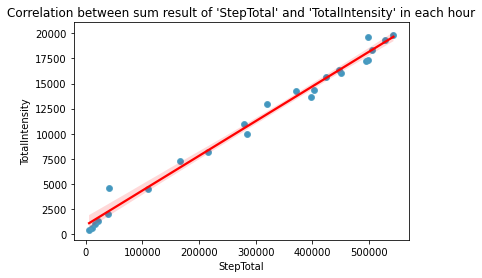

In [13]:
msi = msi_sum.plot(x = "StepTotal", y = "TotalIntensity", kind = "scatter")
sns.regplot(x = msi_sum["StepTotal"], y = msi_sum["TotalIntensity"],ax=msi,scatter_kws = {'color':'#4c9ec2'},line_kws = {'color':'red'})
plt.title("Correlation between sum result of 'StepTotal' and 'TotalIntensity' in each hour")
plt.show()

I see a positive correlation between 'StepTotal' and 'TotalIntensity', which mean If the participant moves little, 
this may indicate light exercise. If they move more, it may mean more intense exercise.

In [14]:
# Merge Intensity and Calories
merge_col_int = pd.merge(intensities,calories,on =["Id","ActivityDate","ActivityHour"])
merge_sum = merge_col_int.groupby("ActivityHour")[["TotalIntensity","Calories"]].sum()
merge_sum

,TotalIntensity,Calories
ActivityHour,,
00:00:00,1989,67066
01:00:00,1324,65464
02:00:00,974,64551
03:00:00,414,63013
04:00:00,590,63620
05:00:00,4614,76152
06:00:00,7235,80994
07:00:00,9993,87959
08:00:00,13656,96207


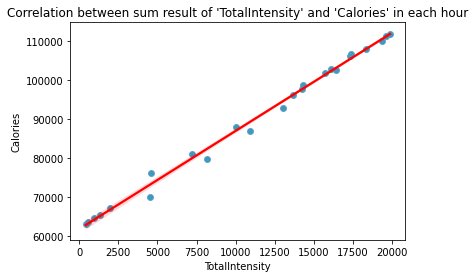

In [15]:
ms = merge_sum.plot(x = "TotalIntensity", y = "Calories",kind = "scatter")

sns.regplot(x = merge_sum["TotalIntensity"], y = merge_sum["Calories"], ax=ms,scatter_kws = {'color':'#4c9ec2'}, line_kws ={'color':'red'})
plt.title("Correlation between sum result of 'TotalIntensity' and 'Calories' in each hour")
plt.show()

I see a positive corrlation between 'TotalIntensity' and 'Calories', which mean a light exercise can decrease a calories also 
a intense excercise can decrease more calories.

In [16]:
# Merge steps and calories
merge_col_steps = pd.merge(steps,calories,on = ["Id","ActivityDate","ActivityHour"])
merge_sumsc = merge_col_steps.groupby("ActivityHour")[["StepTotal","Calories"]].sum()
merge_sumsc

,StepTotal,Calories
ActivityHour,,
00:00:00,39404,67066
01:00:00,21555,65464
02:00:00,15964,64551
03:00:00,5996,63013
04:00:00,11836,63620
05:00:00,40886,76152
06:00:00,166191,80994
07:00:00,284932,87959
08:00:00,398044,96207


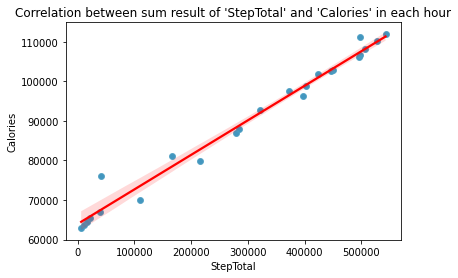

In [17]:
mcs = merge_sumsc.plot(x = "StepTotal", y = "Calories", kind = "scatter")

sns.regplot(x = merge_sumsc["StepTotal"], y = merge_sumsc["Calories"],ax = mcs, scatter_kws = {'color':'#4c9ec2'}, line_kws= {'color':'red'})
plt.title("Correlation between sum result of 'StepTotal' and 'Calories' in each hour")
plt.show()

I see a positive correlation between 'StepTotal' and 'Calories', which mean the more participants move more calories they can burn.

<Axes: xlabel='ActivityHour'>

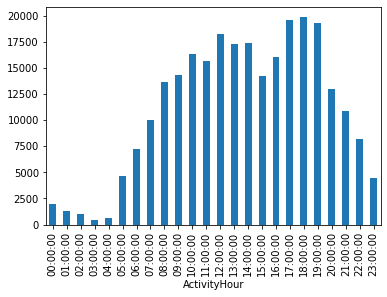

In [18]:
# Let's see a intensity data over the time (Hour)
intensities.groupby("ActivityHour")["TotalIntensity"].sum().plot(kind = "bar")

<Axes: xlabel='ActivityHour'>

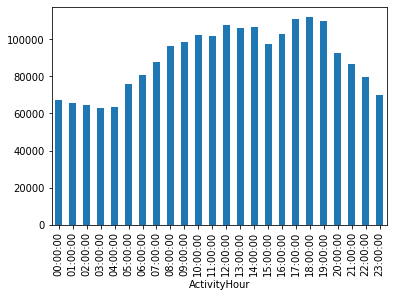

In [19]:
# Let's see a calories data over the time (Hour)
calories.groupby("ActivityHour")["Calories"].sum().plot(kind = "bar")

- After visualize these 2 bar chart. I found that participants more active around 5 pm. - 7 pm.  
                                                                                            
- I can suppose that particants go to gym after they finish a work.

In [20]:
# Merge 'Sleepday' and 'Activity 
merge_act_sleep = pd.merge(sleepday,activity,on = ["Id","ActivityDate"])
merge_act_sleep

,Id,ActivityDate,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,1,327,346,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,2016-04-13,2,384,407,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,2016-04-15,1,412,442,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
3,1503960366,2016-04-16,2,340,367,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863
4,1503960366,2016-04-17,1,700,712,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,8792009665,2016-04-30,1,343,360,7174,4.59,4.59,0.0,0.33,0.36,3.91,0.0,10,20,301,749,2896
409,8792009665,2016-05-01,1,503,527,1619,1.04,1.04,0.0,0.00,0.00,1.04,0.0,0,0,79,834,1962
410,8792009665,2016-05-02,1,415,423,1831,1.17,1.17,0.0,0.00,0.00,1.17,0.0,0,0,101,916,2015
411,8792009665,2016-05-03,1,516,545,2421,1.55,1.55,0.0,0.00,0.00,1.55,0.0,0,0,156,739,2297


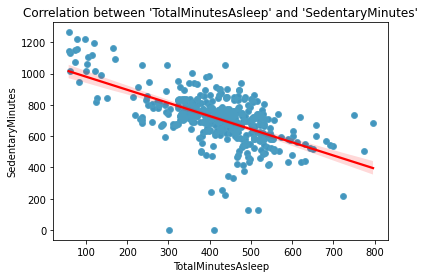

In [21]:
msa = merge_act_sleep.plot(x = "TotalMinutesAsleep",y = "SedentaryMinutes", kind = "scatter")

sns.regplot(x = merge_act_sleep["TotalMinutesAsleep"],y=merge_act_sleep["SedentaryMinutes"],ax = msa, scatter_kws = {'color':'#4c9ec2'},line_kws={'color':'red'})
plt.title("Correlation between 'TotalMinutesAsleep' and 'SedentaryMinutes'")
plt.show()

- I can see a negative correlation between 'TotalMinutesAsleep' and 'SedentaryMinutes'.
- I can ask some other question like "Does more exercise result in less sleep ?". Keep in mind that we need to support this insights with more data.

## Let's see a type of 'Activity' that participants spend time with

<Axes: >

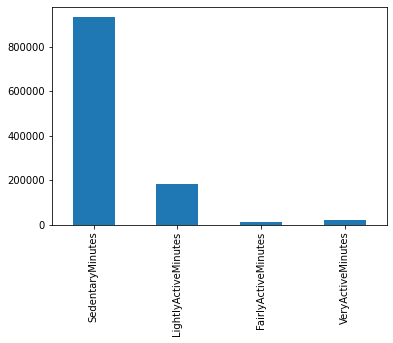

In [22]:
activity[["SedentaryMinutes","LightlyActiveMinutes","FairlyActiveMinutes","VeryActiveMinutes"]].sum().plot(kind = "bar")

In [23]:
activity[["SedentaryMinutes","LightlyActiveMinutes","FairlyActiveMinutes","VeryActiveMinutes"]].sum()/60

SedentaryMinutes 15528.966667
LightlyActiveMinutes 3020.733333
FairlyActiveMinutes 212.516667
VeryActiveMinutes 331.583333
dtype: float64

- participants spend most time on 'SedentaryActive', which mean they do some light activity to stay healthy.

# Summarizing recommendations for the business

As we already know, collecting data on activity has allowed Bellabeat to encourage women with knowledge about their own health and habits

After analyzing FitBit Fitness Tracker Data, I found some insights that would help Bellabeat enhancing marketing strategy for optimal company growth opportunities.

### Target Audience
Woman who work full-time job (according to the hourly intensity data) and work a lot with computer or work that the are doing (according to the sedentary time data)

These woman do a light exercise to stay heathy (according to the most time they spend in 'Activity'). They might need some knowledge or inspriration to increase more exercise for better health.

### Idea for help influence Bellabeat marketing strategy 
- I found insight that participants walk around 7638. Which little bit less for having health benefits for according to the CDC research. Bellabeat may have notify some message on their smart device or launch some campaign to motivate woman out of their table or computer for walk around or do some activity for good health.

- Participants in these dataset didn't sleep less than 7-8 hour per day according to the CDC research. Getting enough sleep is a one way to a good health. Bellabeat can improve customer sleep by app notification to make customer know which time they should go to sleep or create some message to display on smart device like 'Sleep atleast 7 hour per day can make you healthy' for better health of their customer.

- Based on analysis of these dataset, Participants spend most time on 'SedentaryActive' level. If Bellabeat want their customer to exercise more. They can set a level of intensity like 'Today you've burned 250 calories, Another 150 calories you'll be on a LightlyActive level' and summarise calories their burned in the end of month. If customer reach to a calories that they set customer will get some reward like voucher or discount of their product. Campaign like these maybe can make a new customer and good health for old customer.    